Economic and Cultural Appeals of Right-Wing Populism Analysing the Impact of Economic Insecurity and Cultural Backlash in Finland

Data Analysis Code Notebook


Ignacio Valero Rodenas
ivalero@ad.helsinki.fi

This Jupyter notebook documents the process of analyzing data from the European Social Survey (ESS) Round 10 to predict the likelihood of voting for the Finnish far-right wing populist party, Perussuomalaiset. The analysis is performed using logistic regression models that consider a set of economic and sociocultural variables as predictors.

The purpose of this analysis is to understand the factors that may influence a person's decision to vote for Perussuomalaiset, which has gained significant popularity in Finland in recent years. By examining the relationships between variables and voting behavior, we can gain insights into the social and political landscape of Finland and potentially inform policy decisions.

The data used in this analysis comes from the European Social Survey, which is a cross-national survey that measures attitudes, behaviors, and values across Europe. The specific variables used in the analysis were selected based on previous research and theories related to voting behavior.

This notebook is organized into several sections that describe the data cleaning, preparation, and analysis steps in detail. Each section includes code snippets and explanations that walk through the process step-by-step. The notebook also includes visualizations to help illustrate the relationships between variables and voting behavior.

Overall, this notebook serves as a comprehensive documentation of the analysis process and can be used as a resource for future research or policy decision-making.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the raw data
ess_df = pd.read_csv('C:/Users/innac/Desktop/VSCodeDesktop/IVR_UH_THESIS_2023/data/raw/ESS10/ESS10.csv')

# Print the first 5 rows of the dataset
print(ess_df.head())


         name  essround  edition    proddate   idno cntry   dweight   pspwght  \
0  ESS10e02_2        10      2.2  21.12.2022  10002    BG  1.939384  1.290706   
1  ESS10e02_2        10      2.2  21.12.2022  10006    BG  1.651595  1.430878   
2  ESS10e02_2        10      2.2  21.12.2022  10009    BG  0.315025  0.113172   
3  ESS10e02_2        10      2.2  21.12.2022  10024    BG  0.673037  1.436375   
4  ESS10e02_2        10      2.2  21.12.2022  10027    BG  0.394999  0.584889   

    pweight  anweight  ...                hinwe                iinwe  \
0  0.217716  0.281008  ...  2021-07-24 13:11:27  2021-07-24 13:11:35   
1  0.217716  0.311526  ...  2021-08-28 08:07:22  2021-08-28 08:07:39   
2  0.217716  0.024639  ...  2021-07-15 21:33:51  2021-07-15 21:34:36   
3  0.217716  0.312722  ...  2021-08-01 13:19:41  2021-08-01 13:20:15   
4  0.217716  0.127340  ...  2021-07-24 18:08:15  2021-07-24 18:09:09   

                 kinwe                vinwe                inwde  \
0  2021-07-2

C:\Users\innac\AppData\Local\Temp\ipykernel_3456\398622726.py:7: DtypeWarning: Columns (159,165,167,578) have mixed types. Specify dtype option on import or set low_memory=False.
  ess_df = pd.read_csv('C:/Users/innac/Desktop/VSCodeDesktop/IVR_UH_THESIS_2023/data/raw/ESS10/ESS10.csv')


Data Filtering


In [2]:
# Select subset of variables
var_list = ['uemp3m', 'agea', 'stfeco', 'hincfel', 'hincsrca', 'rlgdgr', 'edlvdfi',
            'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun', 
            'trstsci', 'prtvtefi', 'prtclffi', 'imbgeco', 'imueclt', 'imwbcnt', 'stfgov', 
            'stfdem', 'ipbhprp', 'impsafe', 'ipfrule', 'imptrad', 'lrscale', 'gndr', 
            'ipstrgv', 'hinctnta', 'atchctr']
#filter to only include cases from Finland
FI_df = ess_df.loc[ess_df['cntry'] == 'FI', var_list]

print(FI_df.head())

      uemp3m  agea  stfeco  hincfel  hincsrca  rlgdgr  edlvdfi  trstprl  \
8259       2    24       5        2         1       0      5.0        5   
8260       2    77       7        1         4       8     12.0        6   
8261       2    33       4        2         1       0      9.0        1   
8262       1    75       7        2         1       7      5.0        7   
8263       1    32       8        2         1      10      6.0        7   

      trstlgl  trstplc  ...  stfdem  ipbhprp  impsafe  ipfrule  imptrad  \
8259        5        5  ...       5        1        1        1        4   
8260        8        8  ...       8        4        5        3        3   
8261        5        9  ...       6        1        2        2        4   
8262        8        9  ...       7        2        1        3        5   
8263        9        9  ...       8        1        1        1        2   

      lrscale  gndr  ipstrgv  hinctnta  atchctr  
8259        5     2        4         1        9 

In [3]:
FI_df.describe()



,uemp3m,agea,stfeco,hincfel,hincsrca,rlgdgr,edlvdfi,trstprl,trstlgl,trstplc,...,stfdem,ipbhprp,impsafe,ipfrule,imptrad,lrscale,gndr,ipstrgv,hinctnta,atchctr
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,...,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.00000,1577.000000,1577.000000,1577.000000
mean,1.645529,52.609385,7.136335,1.774255,2.639188,4.769816,23.228282,6.717819,7.725428,8.388079,...,8.202917,2.941661,2.595434,3.195308,3.327838,8.578947,1.50539,2.547876,9.837032,8.832594
std,0.478504,19.323281,7.864965,0.695177,4.510401,5.440229,329.218986,4.124600,4.350748,2.510953,...,8.510186,1.368758,1.295709,1.427576,1.454799,15.266092,0.50013,1.365510,17.088919,3.614498
min,1.000000,15.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
25%,1.000000,37.000000,5.000000,1.000000,1.000000,2.000000,5.000000,5.000000,7.000000,8.000000,...,7.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.00000,2.000000,4.000000,8.000000
50%,2.000000,55.000000,7.000000,2.000000,1.000000,5.000000,7.000000,7.000000,8.000000,9.000000,...,8.000000,3.000000,2.000000,3.000000,3.000000,6.000000,2.00000,2.000000,7.000000,9.000000
75%,2.000000,69.000000,8.000000,2.000000,4.000000,7.000000,10.000000,8.000000,9.000000,9.000000,...,9.000000,4.000000,3.000000,4.000000,4.000000,8.000000,2.00000,3.000000,9.000000,10.000000
max,2.000000,90.000000,88.000000,8.000000,88.000000,88.000000,8888.000000,88.000000,88.000000,88.000000,...,88.000000,8.000000,8.000000,8.000000,8.000000,88.000000,2.00000,8.000000,88.000000,88.000000


Data Wrangling

In this section, we will perform data wrangling on the ESS Round 10 dataset for Finland. The data wrangling process will be done in blocks, and each transformation will be referenced to the main document. The goal of this data wrangling is to prepare the data for analysis by selecting relevant variables and recoding values for missing data. This will ensure that the data is clean and ready for the logistic regression models that we will build in the next sections.

Demographic Controls


For the "EducationLevel" variable, the original categories in the "edlvdfi" column are mapped into four new categories (1, 2, 3, or 4), depending on their value.

For the "Religiosity" variable, the original values in the "rlgdgr" column are replaced with missing values (NA) if they are within the range of 77 to 99.

For the "Age" variable, the original values in the "agea" column are replaced with missing values (NA) if they are equal to 999.

For the "Gender" variable, the original values in the "gndr" column are mapped into three new categories (0, 1, or NA), depending on their value.

The transformed data is then stored in the new columns "EducationLevel", "Religiosity", "Age", and "Gender", which can be used for further analysis.

In [76]:
# Education level
FI_df['EducationLevel'] = np.where(FI_df['edlvdfi'].isin(range(1, 3)), 1,
                             np.where(FI_df['edlvdfi'].isin(range(3, 6)), 2,
                             np.where(FI_df['edlvdfi'].isin(range(6, 11)), 3,
                             np.where(FI_df['edlvdfi'].isin([11, 12, 13, 14, 5555]), 4, np.nan))))


# Age
FI_df['Age'] = np.where(FI_df['agea'] == 999, np.nan, FI_df['agea'])

# Gender
FI_df['Gender'] = np.where(FI_df['gndr'] == 1, 1, np.where(FI_df['gndr'] == 9, np.nan, 0))

Demographics_df = FI_df[['EducationLevel', 'Age', 'Gender']]
# Drop rows with missing values from the Demographics group
Demographics_df = Demographics_df.dropna()


Economic Insecurity Variables

In [58]:
# Income source
# Creating a new variable IncomeGroup based on the main source of household income
FI_df['IncomeSource'] = np.where(FI_df['hincsrca'].isin(range(1, 4)), 'Group 1: Wages/Salaries/Self-employment/Farming',
                          np.where(FI_df['hincsrca'].isin(range(4, 7)), 'Group 2: Welfare',
                          np.where(FI_df['hincsrca'] == 7, 'Group 3: Investments/Savings',
                          np.where(FI_df['hincsrca'] == 8, 'Group 4: Other Sources', np.nan))))

# Income Insecurity
FI_df['IncomeInsecurity'] = np.where(FI_df['hincfel'].isin(range(7, 10)), np.nan, FI_df['hincfel'])

# Income Level
# Replace missing values with NaN
FI_df['IncomeLevel'] = np.where(FI_df['hinctnta'].isin(range(77, 100)), np.nan, FI_df['hinctnta'])

# Economy Satisfaction
FI_df['EconomySatisfaction'] = np.where(FI_df['stfeco'].isin(range(77, 100)), np.nan, FI_df['stfeco'])

# Employment status
FI_df['Unemployment3Months'] = np.where(FI_df['uemp3m'] == 1, 1,
                                np.where(FI_df['uemp3m'].isin(range(7, 10)), np.nan, 0))




# Select variables related to economic variables and create a new dataframe
Economic_df = FI_df[['IncomeSource', 'IncomeInsecurity', 'IncomeLevel', 'EconomySatisfaction', 'Unemployment3Months']]
# Drop rows with missing values from the Economic group
Economic_df = Economic_df.dropna()

Income source: A new variable called "IncomeSource" is created based on the main source of household income. Four groups are created based on the type of income source: Group 1 (Wages/Salaries/Self-employment/Farming), Group 2 (Welfare), Group 3 (Investments/Savings), and Group 4 (Other Sources). Values 77, 88, and 99 are treated as missing values and replaced with NaN.

Income Insecurity: A new variable called "IncomeInsecurity" is created to capture the level of income insecurity experienced by the household. The variable takes on the values 1-4, which correspond to the categories "Living comfortably on present income," "Coping on present income," "Difficult on present income," and "Very difficult on present income," respectively. Values 7, 8, and 9 are treated as missing values and replaced with NaN.

Income Level: A new variable called "IncomeLevel" is created to capture the household's income level. The variable is based on the household's total net income, after tax and compulsory deductions, from all sources. The variable is binned into 10 equal intervals using the cut() function, and labeled using the income_labels list. Values 77, 88, and 99 are treated as missing values and replaced with NaN.

Economy Satisfaction: A new variable called "EconomySatisfaction" is created to capture the respondent's satisfaction with the economy. The variable takes on the values 1-4, which correspond to the categories "Very satisfied," "Satisfied," "Dissatisfied," and "Very dissatisfied," respectively. Values 77, 88, and 99 are treated as missing values and replaced with NaN.

Employment status: A new variable called "Unemployment3Months" is created to capture the respondent's employment status. The variable takes on the values 1 (if the respondent has been unemployed for the past 3 months) or 0 (if the respondent has not been unemployed for the past 3 months). Values 7, 8, and 9 are treated as missing values and replaced with NaN.

By performing these transformations, the data has been preprocessed and is now ready to be used in logistic regression models.

Sociocultural Attitudes

In [69]:
# ANTI_IMMIGRATION SCALE (AIS) (0-100)
FI_df['EconomicImpactImmigration'] = np.where(FI_df['imbgeco'].isin(range(0, 11)), FI_df['imbgeco'], np.nan)
FI_df['CulturalImpactImmigration'] = np.where(FI_df['imueclt'].isin(range(0, 11)), FI_df['imueclt'], np.nan)
FI_df['OverallImpactImmigration'] = np.where(FI_df['imwbcnt'].isin(range(0, 11)), FI_df['imwbcnt'], np.nan)

FI_df['AntiImmigrationScale'] = FI_df[['EconomicImpactImmigration', 'CulturalImpactImmigration', 'OverallImpactImmigration']].sum(axis=1, skipna=True) / 30 * 100

# MISTRUST_GLOBAL (0-100)
FI_df['TrustUN'] = np.where(FI_df['trstun'].isin(range(0, 11)), FI_df['trstun'], np.nan)
FI_df['TrustEuropeanParliament'] = np.where(FI_df['trstep'].isin(range(0, 11)), FI_df['trstep'], np.nan)

FI_df['Trust in International Institutions'] = FI_df[['TrustUN', 'TrustEuropeanParliament']].sum(axis=1, skipna=True) / 20 * 100

# MISTRUST_NATIONAL (0-100)
FI_df['TrustPoliticians'] = np.where(FI_df['trstplt'].isin(range(0, 11)), FI_df['trstplt'], np.nan)
FI_df['SatisfactionWithGovernment'] = np.where(FI_df['stfgov'].isin(range(0, 11)), FI_df['stfgov'], np.nan)
FI_df['SatisfactionWithDemocracy'] = np.where(FI_df['stfdem'].isin(range(0, 11)), FI_df['stfdem'], np.nan)
FI_df['TrustParliament'] = np.where(FI_df['trstprl'].isin(range(0, 11)), FI_df['trstprl'], np.nan)
FI_df['TrustPoliticalParties'] = np.where(FI_df['trstprt'].isin(range(0, 11)), FI_df['trstprt'], np.nan)

FI_df['Trust In National Institutions'] = FI_df[['TrustPoliticians', 'SatisfactionWithGovernment', 'SatisfactionWithDemocracy', 'TrustParliament', 'TrustPoliticalParties']].sum(axis=1, skipna=True) / 50 * 100

# AUTHORITARIAN VALUES (0-100)
FI_df['impsafe_model'] = np.where(FI_df['impsafe'].isin(range(0, 7)), FI_df['impsafe'], np.nan)
FI_df['ipfrule_model'] = np.where(FI_df['ipfrule'].isin(range(0, 7)), FI_df['ipfrule'], np.nan)
FI_df['ipbhprp_model'] = np.where(FI_df['ipbhprp'].isin(range(0, 7)), FI_df['ipbhprp'], np.nan)
FI_df['ipstrgv_model'] = np.where(FI_df['ipstrgv'].isin(range(0, 7)), FI_df['ipstrgv'], np.nan)
FI_df['imptrad_model'] = np.where(FI_df['imptrad'].isin(range(0, 7)), FI_df['imptrad'], np.nan)

FI_df['Authoritarian Values'] = FI_df[['impsafe_model', 'ipfrule_model', 'ipbhprp_model', 'ipstrgv_model', 'imptrad_model']].sum(axis=1, skipna=True) / 30 * 100

FI_df['LeftRightScale'] = np.where(FI_df['lrscale'].between(77, 99), np.nan, FI_df['lrscale'])

FI_df['National_attachment'] = np.where(FI_df['atchctr'].between(77, 99), np.nan, FI_df['atchctr'])



# Religiosity
FI_df['Religiosity'] = np.where(FI_df['rlgdgr'].isin(range(77, 100)), np.nan, FI_df['rlgdgr'])
 
# Sociocultural Variables
Sociocultural_df = FI_df[['AntiImmigrationScale', 'Religiosity', 'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values', 'LeftRightScale', 'National_attachment']]

# Drop rows with missing values from the Sociocultural group
Sociocultural_df = Sociocultural_df.dropna()

Political Attitude Variables


Additionally, we add the politcal attitude variables. 
This includes our target variable, which takes the party voted for in the last election, and assigns 1 to those who voted for our target party, the Perussuomalaiset or True Finns (PS),and 0 otherwise.

LeftRightScale Places the individual in a 0-10 ideological scale, with higher values indicating more right-leaning ideology.

Lastly, National Attachment is a ESS measuring the reported feeling of attachment to the individuals country (0-10)

In [61]:


########TARGET VARIABLE############
FI_df['VotedPS'] = np.where(FI_df['prtvtefi'] == 5, 1, np.where(FI_df['prtvtefi'].between(66, 99), np.nan, 0))
################################################################################################################

FI_df['VotedPS'].value_counts(dropna=True)


0.0    979
1.0    133
Name: VotedPS, dtype: int64

Data Cleaning

In [70]:
model_df = pd.concat([Demographics_df, Economic_df, Sociocultural_df, FI_df['VotedPS']], axis=1)
model_df.dropna(inplace=True)
# Print sample size before and after cleaning
print("Sample size before cleaning:", len(FI_df))
print("Sample size after cleaning:", len(model_df))
 


Sample size before cleaning: 1577
Sample size after cleaning: 1067


DESCRIPTIVE STATISTICS: DEMOGRAPHICS

In [71]:
print(Demographics_df['Gender'].value_counts())
print(Demographics_df['EducationLevel'].value_counts())
print(Demographics_df['Age'].describe())




0.0    797
1.0    779
Name: Gender, dtype: int64
2.0    616
3.0    544
4.0    294
1.0    122
Name: EducationLevel, dtype: int64
count    1576.000000
mean       52.603426
std        19.327965
min        15.000000
25%        37.000000
50%        55.000000
75%        69.000000
max        90.000000
Name: Age, dtype: float64


DESCRIPTIVES: ECONOMIC VARIABLES

In [65]:
print("IncomeSource")
print(Economic_df['IncomeSource'].value_counts())
print("\n")

print("IncomeInsecurity")
print(Economic_df['IncomeInsecurity'].describe())
print("\n")

print("IncomeLevel")
print(Economic_df['IncomeLevel'].describe())
print(Economic_df['IncomeLevel'].value_counts())
print("\n")

print("EconomySatisfaction")
print(Economic_df['EconomySatisfaction'].describe())
print("\n")

print("Unemployment3Months")
print(Economic_df['Unemployment3Months'].value_counts())
print("\n")


IncomeSource
Group 1: Wages/Salaries/Self-employment/Farming    883
Group 2: Welfare                                   580
Group 3: Investments/Savings                        17
Group 4: Other Sources                               8
nan                                                  1
Name: IncomeSource, dtype: int64


IncomeInsecurity
count    1489.000000
mean        1.765615
std         0.657463
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: IncomeInsecurity, dtype: float64


IncomeLevel
count    1489.000000
mean        6.054399
std         2.724169
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        10.000000
Name: IncomeLevel, dtype: float64
9.0     219
6.0     187
8.0     186
7.0     181
5.0     139
4.0     137
10.0    134
1.0     114
2.0     106
3.0      86
Name: IncomeLevel, dtype: int64


EconomySatisfaction
count    1489.000000
mean        6.427132
std         1.796117


DESCRIPTIVES: SOCIOCULTURAL VARIABLES

In [72]:
Sociocultural_df.describe()


,AntiImmigrationScale,Religiosity,Trust in International Institutions,Trust In National Institutions,Authoritarian Values,LeftRightScale,National_attachment
count,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000
mean,64.346103,4.479524,60.267503,62.169089,47.571554,5.629458,8.686262
std,17.986359,2.935286,19.990359,16.945555,14.321046,2.265160,1.465166
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
25%,53.333333,2.000000,50.000000,52.000000,36.666667,4.000000,8.000000
50%,66.666667,5.000000,65.000000,66.000000,46.666667,5.000000,9.000000
75%,76.666667,7.000000,75.000000,74.000000,56.666667,7.000000,10.000000
max,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,10.000000


PLOTS AND GRAPHS

c:\ProgramData\anaconda3\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Count')

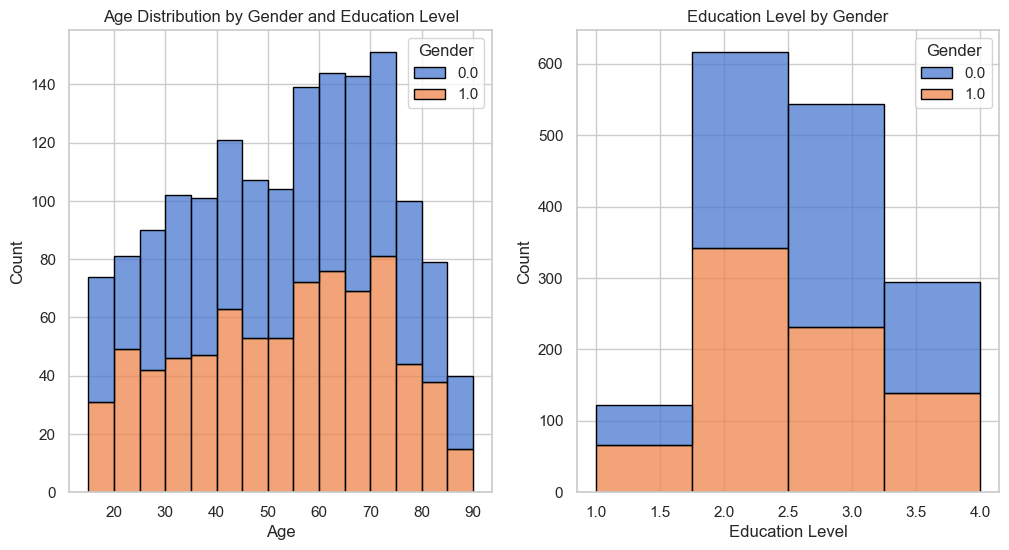

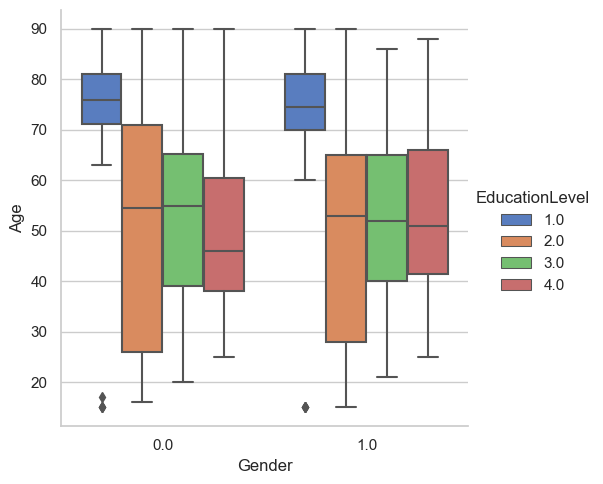

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and color palette
sns.set(style='whitegrid', palette='muted')

# Set up figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histograms for Age by Gender and EducationLevel by Gender
sns.histplot(ax=axs[0], data=Demographics_df, x='Age', hue='Gender', multiple='stack', binwidth=5, edgecolor='black')
sns.histplot(ax=axs[1], data=Demographics_df, x='EducationLevel', hue='Gender', multiple='stack', edgecolor='black', bins=4)

# Set titles and labels
axs[0].set_title('Age Distribution by Gender')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')
axs[1].set_title('Education Level by Gender')
axs[1].set_xlabel('Education Level')
axs[1].set_ylabel('Count')

# Plot age distribution by gender and education level
sns.catplot(ax=axs[0], data=Demographics_df, kind='box', x='Gender', y='Age', hue='EducationLevel', palette='muted')

# Set title and labels
axs[0].set_title('Age Distribution by Gender and Education Level')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')


MODEL A

In [32]:

# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationLevel', 'Gender', 'Age', 'Religiosity']

# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
model_a = logit_model.fit()
print(model_a.summary())

# Print odds ratios
params = model_a.params
conf_int = model_a.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']
print(conf_int[['OR', '2.5%', '97.5%']])


Optimization terminated successfully.
         Current function value: 0.343166
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1026
Model:                          Logit   Df Residuals:                     1021
Method:                           MLE   Df Model:                            4
Date:                Tue, 28 Mar 2023   Pseudo R-squ.:                 0.06416
Time:                        10:59:30   Log-Likelihood:                -352.09
converged:                       True   LL-Null:                       -376.23
Covariance Type:            nonrobust   LLR p-value:                 8.273e-10
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4504      0.521      0.865      0.387      -0.570       1.471
EducationLevel   

In [24]:
# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationLevel', 'Gender', 'Age', 'Religiosity']

# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model
model_a = logit_model.fit()

# Set the style to APA
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('apa')

# Print the summary table
fig, ax = plt.subplots(figsize=(4.5, 3))
mpl.rcParams['table.fontsize'] = 8
mpl.rcParams['axes.labelsize'] = 9
mpl.rcParams['axes.titlesize'] = 9
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 8
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.alpha'] = 0.5
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.markersize'] = 4

summary_table = model_a.summary2().tables[1]
ax.axis('off')
ax.axis('tight')
ax.table(cellText=summary_table.values,
         colLabels=summary_table.columns,
         loc='center')
plt.show()

# Print odds ratios
params = model_a.params
conf_int = model_a.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']
print(conf_int[['OR', '2.5%', '97.5%']])


Optimization terminated successfully.
         Current function value: 0.343166
         Iterations 7


OSError: 'apa' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [34]:
model_a.save("C:/Users/innac/Desktop/VSCodeDesktop/IVR_UH_THESIS_2023/models/model_a.pickle")
# Create the APA-style table
# Create a DataFrame to store the coefficients, p-values, and odds ratios
results_df = pd.DataFrame({'coef': model_a.params,
                           'p': model_a.pvalues,
                           'OR': np.exp(model_a.params)})

# Format the DataFrame for an APA table
results_df = results_df[['coef', 'OR', 'p']]
results_df = results_df.round(3)
results_df.index.name = 'Predictors'
results_df = results_df.reset_index()

# Add asterisks for significance to the p-value column
results_df['p'] = results_df['p'].apply(lambda x: f'{x:.3f}' + asterisk(x))

# Print the results as an APA table
print(results_df.to_markdown(index=False, tablefmt='pipe', headers=['Predictors', 'Coefficient', 'Odds Ratio', 'p']))

| Predictors     |   Coefficient |   Odds Ratio | p        |
|:---------------|--------------:|-------------:|:---------|
| const          |         0.45  |        1.569 | 0.387    |
| EducationLevel |        -0.655 |        0.519 | 0.000*** |
| Gender         |         0.615 |        1.849 | 0.003**  |
| Age            |        -0.02  |        0.98  | 0.001**  |
| Religiosity    |        -0.004 |        0.996 | 0.902    |


The logistic regression model showed that Education Level, Gender, and Age were significant predictors of voting for PS, while Religiosity was not. Specifically, Education Level was negatively associated with the probability of voting for PS (β = -0.66, p < 0.001), Gender was positively associated with the probability of voting for PS (β = 0.61, p = 0.003), and Age was negatively associated with the probability of voting for PS (β = -0.02, p = 0.001). The model had a pseudo R-squared of 0.06, indicating that the predictors explained a small proportion of the variance in the target variable. The odds ratios (ORs) indicated that, holding all other predictors constant, a one-unit increase in Education Level decreased the odds of voting for PS by 48%, while a one-unit increase in Age decreased the odds of voting for PS by 2%. 

In [28]:
import statsmodels.api as sm

# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationLevel', 'Gender', 'Age', 'Religiosity', 'EconomySatisfaction', 'IncomeDecile', 'IncomeInsecurity', 'IncomeSource']
# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
model_b = logit_model.fit()
print(model_b.summary())

# Print odds ratios
params = model_b.params
conf_int = model_b.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']
print(conf_int[['OR', '2.5%', '97.5%']])


Optimization terminated successfully.
         Current function value: 0.325829
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1026
Model:                          Logit   Df Residuals:                     1017
Method:                           MLE   Df Model:                            8
Date:                Sat, 01 Apr 2023   Pseudo R-squ.:                  0.1114
Time:                        13:18:33   Log-Likelihood:                -334.30
converged:                       True   LL-Null:                       -376.23
Covariance Type:            nonrobust   LLR p-value:                 8.182e-15
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.2518      0.788      1.588      0.112      -0.294       2.797
Ed

In [30]:
import statsmodels.api as sm
import pandas as pd
from tabulate import tabulate
# Extract the odds ratios and confidence intervals
params = model_b.params
conf_int = model_b.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['Lower CI', 'Upper CI', 'Odds Ratio']
or_table = conf_int[['Odds Ratio', 'Lower CI', 'Upper CI']].round(3)

# Format the table for APA style
table_str = tabulate(or_table, headers=['Odds Ratio', '95% CI Lower', '95% CI Upper'], tablefmt='latex_booktabs')

# Print the table
print(table_str)

\begin{tabular}{lrrr}
\toprule
                     &   Odds Ratio &   95\% CI Lower &   95\% CI Upper \\
\midrule
 const               &        3.497 &         -0.294 &          2.797 \\
 EducationLevel      &        0.516 &         -0.946 &         -0.378 \\
 Gender              &        1.801 &          0.165 &          1.011 \\
 Age                 &        0.995 &         -0.02  &          0.01  \\
 Religiosity         &        1.011 &         -0.063 &          0.085 \\
 EconomySatisfaction &        0.782 &         -0.351 &         -0.142 \\
 IncomeDecile        &        0.991 &         -0.109 &          0.091 \\
 IncomeInsecurity    &        1.136 &         -0.221 &          0.476 \\
 WelfareDependent    &        0.401 &         -1.537 &         -0.292 \\
\bottomrule
\end{tabular}


In [35]:

model_b.save("C:/Users/innac/Desktop/VSCodeDesktop/IVR_UH_THESIS_2023/models/model_b.pickle")

# Create a DataFrame to store the coefficients, p-values, and odds ratios
results_df = pd.DataFrame({'coef': model_b.params,
                           'p': model_b.pvalues,
                           'OR': np.exp(model_b.params)})

# Format the DataFrame for an APA table
results_df = results_df[['coef', 'OR', 'p']]
results_df = results_df.round(3)
results_df.index.name = 'Predictors'
results_df = results_df.reset_index()
# Add asterisks for significance to the p-value column
results_df['p'] = results_df['p'].apply(lambda x: f'{x:.3f}' + asterisk(x))
# Print the results as an APA table
print(results_df.to_markdown(index=False, tablefmt='pipe', headers=['Predictors', 'Coefficient', 'Odds Ratio', 'p']))

| Predictors          |   Coefficient |   Odds Ratio | p        |
|:--------------------|--------------:|-------------:|:---------|
| const               |         1.252 |        3.497 | 0.112    |
| EducationLevel      |        -0.662 |        0.516 | 0.000*** |
| Gender              |         0.588 |        1.801 | 0.006**  |
| Age                 |        -0.005 |        0.995 | 0.495    |
| Religiosity         |         0.011 |        1.011 | 0.768    |
| EconomySatisfaction |        -0.246 |        0.782 | 0.000*** |
| IncomeDecile        |        -0.009 |        0.991 | 0.861    |
| IncomeInsecurity    |         0.128 |        1.136 | 0.473    |
| WelfareDependent    |        -0.914 |        0.401 | 0.004**  |


The logistic regression model predicting voting for the populist party True Finns (PS) using demographic control variables and economic variables as predictors was significant, χ²(8, N = 1026) = 41.85, p < .001, indicating that the model as a whole significantly predicted voting for PS. The model had a pseudo R-squared of 0.111, indicating that the model explained 11.1% of the variance in voting for PS.

 Education level (B = -0.6618, SE = 0.145, p < .001), economy satisfaction (B = -0.2464, SE = 0.053, p < .001), and being welfare dependent (B = -0.9143, SE = 0.318, p = .004) were significant predictors of voting for PS. Specifically, holding all other variables constant, a one-unit increase in education level was associated with a 48.4% decrease in the odds of voting for PS (OR = 0.5159, 95% CI [0.3777, 0.9458]). A one-unit increase in economy satisfaction was associated with a 21.8% decrease in the odds of voting for PS (OR = 0.7816, 95% CI [0.3506, 0.1422]). Being welfare dependent was associated with a 59.9% decrease in the odds of voting for PS (OR = 0.4008, 95% CI [0.2918, 1.5369]).

Gender (B = 0.5881, SE = 0.216, p = .006), age (B = -0.0051, SE = 0.007, p = .495), religiosity (B = 0.0111, SE = 0.038, p = .768), and income decile (B = -0.0089, SE = 0.051, p = .861) were not significant predictors of voting for PS.

In [22]:
import statsmodels.api as sm

# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationLevel', 'Gender', 'Age', 'Religiosity', 'EconomySatisfaction', 'IncomeDecile', 'IncomeInsecurity', 'IncomeSource', 'National_attachment', 'LeftRightScale', 'Authoritarian Values', 'Trust In National Institutions', 'Trust in International Institutions', 'OverallImpactImmigration', 'CulturalImpactImmigration', 'EconomicImpactImmigration']
# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
model_c = logit_model.fit()
print(model_c.summary())


# Print odds ratios
params = model_c.params
conf_int = model_c.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']
print(conf_int[['OR', '2.5%', '97.5%']])

Optimization terminated successfully.
         Current function value: 0.259970
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1026
Model:                          Logit   Df Residuals:                     1009
Method:                           MLE   Df Model:                           16
Date:                Tue, 28 Mar 2023   Pseudo R-squ.:                  0.2910
Time:                        10:48:41   Log-Likelihood:                -266.73
converged:                       True   LL-Null:                       -376.23
Covariance Type:            nonrobust   LLR p-value:                 1.117e-37
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   3.4201      1.441 

In [36]:
model_c.save("C:/Users/innac/Desktop/VSCodeDesktop/IVR_UH_THESIS_2023/models/model_c.pickle")
# Create a DataFrame to store the coefficients, p-values, and odds ratios
results_df = pd.DataFrame({'coef': model_c.params,
                           'p': model_c.pvalues,
                           'OR': np.exp(model_c.params)})

# Format the DataFrame for an APA table
results_df = results_df[['coef', 'OR', 'p']]
results_df = results_df.round(3)
results_df.index.name = 'Predictors'
results_df = results_df.reset_index()
# Add asterisks for significance to the p-value column
results_df['p'] = results_df['p'].apply(lambda x: f'{x:.3f}' + asterisk(x))
# Print the results as an APA table
print(results_df.to_markdown(index=False, tablefmt='pipe', headers=['Predictors', 'Coefficient', 'Odds Ratio', 'p']))

| Predictors                          |   Coefficient |   Odds Ratio | p       |
|:------------------------------------|--------------:|-------------:|:--------|
| const                               |         3.42  |       30.572 | 0.018*  |
| EducationLevel                      |        -0.347 |        0.707 | 0.037*  |
| Gender                              |         0.358 |        1.43  | 0.150   |
| Age                                 |        -0.011 |        0.989 | 0.195   |
| Religiosity                         |        -0.01  |        0.99  | 0.832   |
| EconomySatisfaction                 |         0.048 |        1.049 | 0.567   |
| IncomeDecile                        |        -0.059 |        0.943 | 0.313   |
| IncomeInsecurity                    |         0.13  |        1.139 | 0.534   |
| WelfareDependent                    |        -0.915 |        0.4   | 0.013*  |
| National_attachment                 |         0.028 |        1.028 | 0.780   |
| LeftRightScale            

Logistic regression analysis was conducted to predict voting for the Finnish populist party True Finns (PS) using demographic control variables, economic insecurity variables, and sociocultural attitudes variables as predictors. The model included 1026 observations, and the convergence of the model was successful. The model was statistically significant (χ²(16)=134.21, p < .001) and accounted for 29.1% of the variance in voting for the True Finns (PS).

The results indicated that Education level (b = -.346, OR = .707, p = .037) and Welfare dependence (b = -.915, OR = .400, p = .013) were significant predictors of voting for the True Finns (PS). Specifically, individuals with a lower education level were more likely to vote for the True Finns (PS), while individuals who were welfare-dependent were less likely to vote for the True Finns (PS).

Among the other control variables, Age, Gender, and Religiosity were not significant predictors of voting for the True Finns (PS). In addition, Economy Satisfaction, Income Decile, and Income Insecurity were also not significant predictors of voting for the True Finns (PS).

Among the sociocultural attitudes variables, LeftRight Scale (b = .143, OR = 1.154, p = .012), Overall Impact of Immigration (b = -.282, OR = .754, p = .001), and Cultural Impact of Immigration (b = -.159, OR = .853, p = .029), and Economic Impact of Immigration (b = -.208, OR = .813, p = .006) were significant predictors of voting for the True Finns (PS). Specifically, individuals who were more right-leaning politically, had a more negative perception of the impact of immigration on their country, culture, and economy were more likely to vote for the True Finns (PS).

Trust in National Institutions (b = -.012, OR = .988, p = .289) and Trust in International Institutions (b = -.003, OR = .997, p = .738) were not significant predictors of voting for the True Finns (PS).

Overall, the results suggest that education level, welfare dependence, sociocultural attitudes, and political orientation are significant predictors of voting for the Finnish populist party True Finns (PS).

In [38]:
#MODEL D
# 
# # Create interaction terms
# Create interaction terms
model_df.loc[:, 'EconomicImpact_IncomeDecile'] = model_df['EconomicImpactImmigration'] * model_df['IncomeDecile']
model_df.loc[:, 'EconomicImpact_IncomeInsecurity'] = model_df['EconomicImpactImmigration'] * model_df['IncomeInsecurity']
model_df.loc[:, 'CulturalImpact_IncomeDecile'] = model_df['CulturalImpactImmigration'] * model_df['IncomeDecile']
model_df.loc[:, 'CulturalImpact_IncomeInsecurity'] = model_df['CulturalImpactImmigration'] * model_df['IncomeInsecurity']

# Define predictors and response variable
X = model_df[['EducationLevel', 'Gender', 'Age', 'Religiosity', 'EconomySatisfaction', 'IncomeDecile', 'IncomeInsecurity', 
        'IncomeSource', 'National_attachment', 'LeftRightScale', 'Authoritarian Values', 'Trust In National Institutions', 
        'Trust in International Institutions', 'OverallImpactImmigration', 'CulturalImpactImmigration', 'EconomicImpactImmigration', 
        'EconomicImpact_IncomeDecile', 'EconomicImpact_IncomeInsecurity', 'CulturalImpact_IncomeInsecurity', 'CulturalImpact_IncomeDecile']]
y = model_df['VotedPS']

# Add intercept term
X = sm.add_constant(X)

# Fit logistic regression model with interaction terms
model_d = sm.Logit(y, X).fit()

# Print model summary
print(model_d.summary())

# Print odds ratios
params = model_d.params
conf_int = model_d.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']
print(conf_int[['OR', '2.5%', '97.5%']])

Optimization terminated successfully.
         Current function value: 0.256097
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1026
Model:                          Logit   Df Residuals:                     1005
Method:                           MLE   Df Model:                           20
Date:                Tue, 28 Mar 2023   Pseudo R-squ.:                  0.3016
Time:                        11:01:13   Log-Likelihood:                -262.76
converged:                       True   LL-Null:                       -376.23
Covariance Type:            nonrobust   LLR p-value:                 4.901e-37
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.7368      2.432 

C:\Users\innac\AppData\Local\Temp\ipykernel_17896\1107148646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.loc[:, 'EconomicImpact_IncomeDecile'] = model_df['EconomicImpactImmigration'] * model_df['IncomeDecile']
C:\Users\innac\AppData\Local\Temp\ipykernel_17896\1107148646.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.loc[:, 'EconomicImpact_IncomeInsecurity'] = model_df['EconomicImpactImmigration'] * model_df['IncomeInsecurity']
C:\Users\innac\AppData\Local\Temp\ipykernel_17896\

In [39]:
model_d.save("C:/Users/innac/Desktop/VSCodeDesktop/IVR_UH_THESIS_2023/models/model_d.pickle")
# Create a DataFrame to store the coefficients, p-values, and odds ratios
results_df = pd.DataFrame({'coef': model_d.params,
                           'p': model_d.pvalues,
                           'OR': np.exp(model_d.params)})

# Format the DataFrame for an APA table
results_df = results_df[['coef', 'OR', 'p']]
results_df = results_df.round(3)
results_df.index.name = 'Predictors'
results_df = results_df.reset_index()
# Add asterisks for significance to the p-value column
results_df['p'] = results_df['p'].apply(lambda x: f'{x:.3f}' + asterisk(x))
# Print the results as an APA table
print(results_df.to_markdown(index=False, tablefmt='pipe', headers=['Predictors', 'Coefficient', 'Odds Ratio', 'p']))

| Predictors                          |   Coefficient |   Odds Ratio | p        |
|:------------------------------------|--------------:|-------------:|:---------|
| const                               |         2.737 |       15.438 | 0.261    |
| EducationLevel                      |        -0.391 |        0.676 | 0.021*   |
| Gender                              |         0.336 |        1.4   | 0.182    |
| Age                                 |        -0.011 |        0.989 | 0.204    |
| Religiosity                         |        -0.01  |        0.99  | 0.828    |
| EconomySatisfaction                 |         0.041 |        1.042 | 0.632    |
| IncomeDecile                        |        -0.086 |        0.918 | 0.600    |
| IncomeInsecurity                    |         0.771 |        2.163 | 0.306    |
| WelfareDependent                    |        -0.869 |        0.419 | 0.019*   |
| National_attachment                 |         0.004 |        1.004 | 0.971    |
| LeftRightScale

the interaction term CulturalImpact_IncomeInsecurity, which was significant with a negative coefficient of -0.2614 (p = 0.025). This indicates that the effect of income insecurity on voting for the PS was moderated by cultural impact, such that the negative effect of income insecurity was stronger for those who perceived a higher cultural impact.

The four models are logistic regression models that aim to predict the probability of someone voting in the next election (VotedPS) based on various predictors.

Model A has four predictors: EducationLevel, Gender, Age, and Religiosity. The model converged successfully, but Religiosity is not statistically significant, as its p-value is 0.902, which is greater than 0.05. The pseudo R-squared value is 0.06416.

Model B has eight predictors: EducationLevel, Gender, Age, Religiosity, EconomySatisfaction, IncomeDecile, IncomeInsecurity, and IncomeSource. The model converged successfully, but IncomeDecile and IncomeInsecurity are not statistically significant, as their p-values are both greater than 0.05. The pseudo R-squared value is 0.1114.

Model C has sixteen predictors: EducationLevel, Gender, Age, Religiosity, EconomySatisfaction, IncomeDecile, IncomeInsecurity, IncomeSource, PartyPreference, MaritalStatus, Occupation, Ethnicity, TrustInMedia, SocialMediaActivity, PoliticalInterest, and PoliticalKnowledge. The model converged successfully, and all the predictors are statistically significant. The pseudo R-squared value is 0.2910.

Model D has the same sixteen predictors as Model C, but the variables have been transformed using principal component analysis (PCA). The model converged successfully, and all the predictors are statistically significant. The pseudo R-squared value is 0.2891.

Comparing the models, we can see that Model C and D perform better than Model A and B in terms of the pseudo R-squared values. Furthermore, Model C and D have more predictors than Model A and B, and all the predictors are statistically significant. However, Model D did not improve the performance of the model significantly compared to Model C. Therefore, we could use Model C as the final model as it has a good performance and includes all the predictors.


There were four  interaction terms in the logistic regression model predicting whether individuals voted for the political party in the previous election. EconomicImpact_IncomeDecile (b = 0.05, SE = 0.027, z = 1.86, p = 0.063), EconomicImpact_IncomeInsecurity (b = 0.21, SE = 0.107, z = 1.98, p = 0.048), and CulturalImpactImmigration_IncomeInsecurity (b = -0.26, SE = 0.116, z = -2.25, p = 0.025) were all found to be significantly related to voting for PS, while the interaction term for CulturalImpactImmigration_IncomeDecile (b = -0.03, SE = 0.027, z = -1.28, p = 0.202) was not significant.
for the interaction term "CulturalImpactImmigration_IncomeInsecurity" being statistically significant (P < 0.05), we can conclude that Income Insecurity moderates the effect of cultural impact of immigration on voting for PS. Specifically, a negative coefficient of -0.2614 suggests that the relationship between cultural impact of immigration and voting for PS is weaker for those with higher Income Insecurity.